# Desafío - Regresión desde la econometría

## Esteban Gonzalez Amigo

## Desafío 1: Prepare el ambiente de trabajo
- Importe las librerías básicas para el análisis de datos.
- Incluya los import base de statsmodels .
- Importe la base de datos Credit.csv y elimine la columna Unnamed: 0 .
- Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de Ethnicity , genere binarias para
- AfricanAmerican y Asian.
        -tip: Utilice value_counts() para revisar la cantidad de casos en las variables categóricas.


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf


plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] =(10, 6) 

In [2]:
df= pd.read_csv('Credit.csv').drop('Unnamed: 0', axis=1)
df.sample(10)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
67,11.187,5099,380,4,69,16,Female,No,No,African American,889
285,18.967,1626,156,2,41,11,Female,No,Yes,Asian,0
371,39.116,2150,173,4,75,15,Male,No,No,Caucasian,0
296,65.896,5140,370,1,49,17,Female,No,Yes,Caucasian,293
172,76.348,4697,344,4,60,18,Male,No,No,Asian,108
237,60.579,5149,388,5,38,15,Male,No,Yes,Asian,443
14,19.144,3291,269,2,75,13,Female,No,No,African American,148
279,54.319,3063,248,3,59,8,Female,Yes,No,Caucasian,269
158,42.357,5550,406,2,83,12,Female,No,Yes,Asian,653
174,121.834,10673,750,3,54,16,Male,No,No,African American,1573


In [3]:
df_prueba = df.copy()

In [4]:


df_prueba['African_American'] = np.where(df_prueba['Ethnicity'] == 'African American', 1, 0)
df_prueba['Asian'] = np.where(df_prueba['Ethnicity'] == 'Asian', 1, 0)
df_prueba['bin_married']= np.where(df_prueba['Married']=='Yes', 0, 1)
df_prueba['bin_gender']= np.where(df_prueba['Gender']==' Male', 1, 0)
df_prueba['bin_student']= np.where(df_prueba['Student']=='Yes', 1, 0)


In [5]:
df_prueba.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,African_American,Asian,bin_married,bin_gender,bin_student
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,0,1,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1,0,0,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0,1,1,1,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0,1,1,0,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,0,1,0


In [6]:
print(df_prueba['African_American'].value_counts())
print(df_prueba['Asian'].value_counts())
print(df_prueba['Married'].value_counts())
print(df_prueba['Student'].value_counts())
print(df_prueba['Gender'].value_counts())

0    301
1     99
Name: African_American, dtype: int64
0    298
1    102
Name: Asian, dtype: int64
Yes    245
No     155
Name: Married, dtype: int64
No     360
Yes     40
Name: Student, dtype: int64
Female    207
 Male     193
Name: Gender, dtype: int64


In [7]:
df_prueba['bin_gender'].value_counts()

0    207
1    193
Name: bin_gender, dtype: int64

## Desafío 2: Genere gráficos descriptivos para las variables contínuas
- Genere una función llamada plot_hist que genere un histograma de la variable e indique la media y mediana de la misma. Agrege una legenda para indicar qué representa cada línea.
- ¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?

In [8]:
def plot_hist (dataframe, var):
    plt.hist(dataframe[var].dropna())
    plt.axvline(dataframe[var].mean(), lw=3, color= 'tomato', linestyle='--', label = 'media: {0}'.format(round(dataframe[var].mean(),1)))
    plt.axvline(dataframe[var].median(), lw=3, color= 'green', linestyle='--', label = 'mediana: {0}'.format(round(dataframe[var].median())))
    plt.title('Histograma para balance')
    plt.legend()

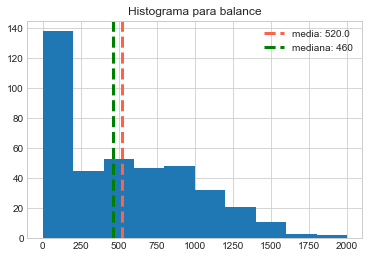

In [9]:
plot_hist(df_prueba, 'Balance')
# el promedio de la deuda de los usuarios es se distribuye de for

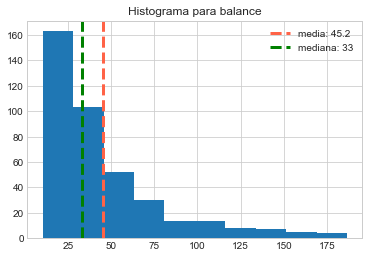

In [10]:
plot_hist(df_prueba, 'Income')

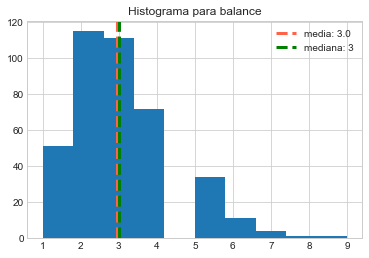

In [11]:
plot_hist(df_prueba, 'Cards')

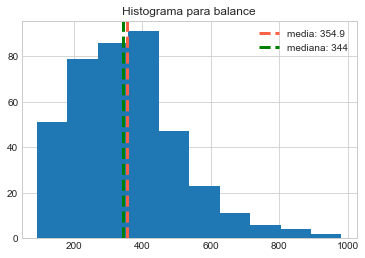

In [12]:
plot_hist(df_prueba, 'Rating')

## Desafío 3: Regresión Lineal Simple

In [13]:
modelo = smf.ols('Balance ~ Student',df_prueba).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           1.49e-07
Time:                        07:20:01   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
Student[T.Yes]   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
modelo2 = smf.ols('Balance ~ Income',df_prueba).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           1.03e-22
Time:                        07:20:02   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
modelo3 = smf.ols('Balance ~ Rating',df_prueba).fit()
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Tue, 11 Jun 2019   Prob (F-statistic):          1.90e-120
Time:                        07:20:02   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# la variable que mejor explica la variabilidad de balance es rating, con un r cuadriado de 74,6 %
# de student podedos decir que explica la variabilidad de balance en solo un 6,7 %

In [17]:
# aqui debo hacer una prueba de hipotesis y hacer lo de los grupos, luego hacer el boxplot
def prueba_hipotesis(df, variable, binarize):
    grupo0= df[df[binarize]==0][variable].dropna()
    grupo1= df[df[binarize]==1][variable].dropna()
    
    t, p = stats.ttest_ind(grupo0, grupo1)
    
    media_grupo0 = grupo0.mean()
    media_grupo1 = grupo1.mean()

    diferencia_medias = media_grupo0 - media_grupo1


    print('El valor t es: ',t,' y el valor p es: ',p)
    print('La diferencia entre las medias es: ',diferencia_medias)
    print('La media paral el grupo 0 es: ',media_grupo0,' y la media del grupo 1 es: ',media_grupo1)

In [18]:
prueba_hipotesis(df_prueba, 'Balance', 'bin_student')
# se rechaza la hipotesis nula 

El valor t es:  -5.349964123075003  y el valor p es:  1.4877341077323024e-07
La diferencia entre las medias es:  -396.4555555555556
La media paral el grupo 0 es:  480.36944444444447  y la media del grupo 1 es:  876.825


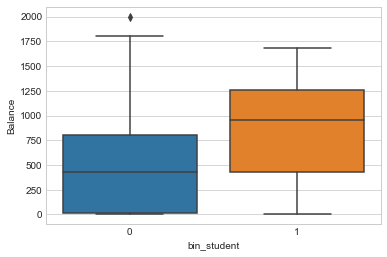

In [19]:
sns.boxplot(x=df_prueba['bin_student'], y= df_prueba['Balance']);

## Desafío 4: Genere un modelo que incluya todos los regresores
- Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores.


In [20]:
modelo_completo = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity + African_American + Asian + bin_married + bin_gender + bin_student',df_prueba).fit()
modelo_completo.summary()

# el poder explicativo para balance de toda la muestra es de 95,5 %

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Tue, 11 Jun 2019   Prob (F-statistic):          1.11e-253
Time:                        07:20:11   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -200.5824     14.106    -14.220      0.000    -228.315    -172.850
Gender[T.Female]        -105.6178      8.612    -12.264      0.000    -122.550     -88.686
Student[T.Yes]           212.8737      8.361     25.459      0.000     196.435     229.313
Married[T.Yes]          -104.5582      8.828    -11.843      0.000    -121.916     -87.201
Ethnicity[T.Asian]       -35.4162      5.266     -6.725      0.000     -45.770     -25.062
Ethnicity[T.Caucasian]   -77.5296      8.063     -9.615      0.000     -93.383     -61.676
Income                    -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                      0.1909      0.033      5.824      0.000       0.126       0.255
Rating                     1.1365      0.491      2.315      0.021       0.171       2.102
Cards                     17.7245      4.341      4.083      0.000       9.190      26.259
Age                       -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education                 -1.0989      1.598     -0.688      0.492      -4.241       2.043
African_American         -87.6366      9.381     -9.342      0.000    -106.080     -69.194
Asian                    -35.4162      5.266     -6.725      0.000     -45.770     -25.062
bin_married              -96.0243      8.674    -11.070      0.000    -113.078     -78.971
bin_gender               -94.9646      8.629    -11.005      0.000    -111.930     -77.999
bin_student              212.8737      8.361     25.459      0.000     196.435     229.313
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     5.75e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.38e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
df_prueba.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance', 'African_American',
       'Asian', 'bin_married', 'bin_gender', 'bin_student'],
      dtype='object')

## 5

In [22]:
##hay que sacar las variables que tienen la p menor a 0.025 y dejar el modelo solo con las variables significativas

# creo que seran 3

In [23]:
modelo_refac = smf.ols('Balance ~ Income + Limit + Rating + Cards + Gender + Student + Married + Ethnicity + African_American + Asian + bin_married + bin_gender + bin_student',df_prueba).fit()
modelo_refac.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     909.8
Date:                Tue, 11 Jun 2019   Prob (F-statistic):          1.39e-255
Time:                        07:20:12   Log-Likelihood:                -2401.2
No. Observations:                 400   AIC:                             4822.
Df Residuals:                     390   BIC:                             4862.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -220.5780      8.301    -26.572      0.000    -236.899    -204.257
Gender[T.Female]        -115.7194      6.476    -17.870      0.000    -128.451    -102.988
Student[T.Yes]           213.1056      8.357     25.499      0.000     196.674     229.537
Married[T.Yes]          -113.9601      6.687    -17.042      0.000    -127.107    -100.813
Ethnicity[T.Asian]       -38.9046      4.805     -8.096      0.000     -48.352     -29.457
Ethnicity[T.Caucasian]   -85.2427      6.805    -12.526      0.000     -98.622     -71.863
Income                    -7.8797      0.232    -33.973      0.000      -8.336      -7.424
Limit                      0.1902      0.033      5.798      0.000       0.126       0.255
Rating                     1.1550      0.491      2.351      0.019       0.189       2.121
Cards                     17.3904      4.354      3.994      0.000       8.830      25.951
African_American         -96.4307      8.037    -11.998      0.000    -112.233     -80.629
Asian                    -38.9046      4.805     -8.096      0.000     -48.352     -29.457
bin_married             -106.6179      6.580    -16.204      0.000    -119.554     -93.682
bin_gender              -104.8586      6.482    -16.177      0.000    -117.602     -92.115
bin_student              213.1056      8.357     25.499      0.000     196.674     229.537
==============================================================================
Omnibus:                       31.777   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.281
Skew:                           0.739   Prob(JB):                     8.03e-09
Kurtosis:                       3.224   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
# el modelo permanecio similar a como ya estaba

## 6

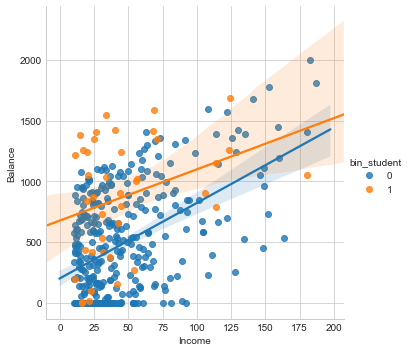

In [25]:
# googlear la el tipo de gtafico y ver como funcion


g = sns.lmplot(x='Income', y='Balance', hue= 'bin_student', data=df_prueba)